### Aim- To develop a Machine learning model to predict the price of the property using the other variables

In [1]:
# %matplotlib inline is a magic function(line) which is used to show all the plots in jupyter notebook itself just below the code cell.
#If not uesd , it might show plots in an external window
# Numpy is used for dealing with the numerical data.
#matplotlib.rcParams["figure.figsize"]=(20,10) we decide the respective length of X(length) and Y(height)=(20,10)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv("bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
# will tell the number of rows and cols

df.shape

(13320, 9)

In [4]:
# Will tell the count of the areas by their names/number of entries of each area

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# dropping some columns to make the prediction simpler.

df0=df.drop(['availability', 'area_type','balcony','society'],axis='columns')

# Data Cleaning


In [6]:
#checking the null values in the data set

df0.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#Dropping the null values

df1= df0.dropna()
df1.shape

(13246, 5)

In [8]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
#checks the unique values in the size column.

df1['size'].unique() 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# We see that BHK and bedrooms are essentially same and hence we can create a new column stating the bhk.
# so we are basically splitting the size column into two parts i.e the number 2,4,5,6 etc and BHK/bedroom.
# Now we use python lambda function for the splitting and 'x' will contain the column values for each of the rows one by one.
#lambda is simply a one line function.
# and from the spliited values we take [0] i.e numerical values and save in the newly made bhk column.
# copy is created so as to avoid "A value is trying to be set on a copy of a slice from a DataFrame" warning.
#The code will still be executed but will show the warning which does'nt look good.

df2 = df1.copy()
df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))

for ex:

1)def sum(x,y):

return x+y

2) lambda x,y : x+y


In [11]:
#this gives us the unique bhk values.

df2['bhk'].unique() 

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
#Now here we observe some absurd bhk value 27, 43 etc.

df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [13]:
#checking the details for bhk>20

df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
# Range of total_sqft is there which we need to convert into a single value

df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# Lets find out the such range in total_sqft
# so the is float function will try to find out the float values and if they are not float they will go into except.
#try and except are used to avoid an error. it simply means try it ,if executes then ok or proceeds further
#and execute remaining code and 'print' the error message unlike the normal code.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

 for ex:
 
 num1= input()
 
 num2= input()
 
 print( int(num1) + int(num2))
 
 print("Its important to proceed")
 
 if I enter num1=20 and num2=ujjwal
 
 it will return an error and the last line won't 
 
 be executed to solve this problem we use try and except method. 

In [16]:
#Now we apply is_float function here it will show us the values except the (range ones) and hence we negate it to get the
#range values.

df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [17]:
# functions will split the values of range with respect to '-' and then we will take its average in float
#try will convert normal numbers to float and except will do nothing if its already of float data type.

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)== 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2166')

2166.0

In [19]:
convert_sqft_to_num('2100-2850')

2475.0

In [20]:
convert_sqft_to_num('1133 - 1384')

1258.5

In [21]:
# making a copy of the original one and applying the function on it 
# copy is created so as to avoid "A value is trying to be set on a copy of a slice from a DataFrame" warning.
#The code will still be executed but will show the warning which does'nt look good.

df3 = df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [22]:
# code has worked successfully and range has changed to float value

df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
df3.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

In [24]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [25]:
# creating a new column named price per sqft by dividing the total price by total_sqft

df4 = df3.copy()
df4['price_per_sqft']= df4['price'] * 100000 /df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
# Now lets see the number of unique locations available with us
# We found approx 1300 locations which will be difficult for us to handel while one hot encoding.
#So we will reduce them creating "other" category where we can save locations less than 10 in others


len(df4.location.unique())

1304

In [27]:
# Before looking at the number of locations we need to strip off the leading space or space at the end of the location in the location column.
# Again to avoid the warning we copied first and then used the strip off function.

df5=df4.copy()
df5.location=df5.location.apply(lambda x: x.strip())

In [28]:
# so after stripping of the spaces we are left with 1293 cols

len(df5.location.unique())

1293

In [29]:
#Here we group all the same locations and count their number and name that grouped column as 'location'
#and sort the column in descending order.

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
#I will name locations less than 10 as other location. So we have total 1052 locations with count<10

len(location_stats[location_stats<=10])

1052

In [31]:
#Named all the locations having less than 10 count as 'location_stats_less_than_10'.


location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
# Saving location count < 10 as 'other'

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [34]:
# Now we have to remove the outliers means the unusual values in the data set. Assuming that that 1bhk has min approx 300 sqft area .
#anything less than that, we will consider unusual.

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5.shape

(13246, 7)

In [36]:
# Simplest way to remove the outliers is saving the non-outliers in diff dataframe so we made a 'df6' dataframe 
#and stored or value in it.

df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [37]:
#Now we are left with 12502 rows

df6.shape

(12502, 7)

In [38]:
#describe gives us info about the particular column.

df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
#Assuming our distribution to be a normal distribution,we can say that most of our data points lie between 
#mean and 1 standard deviation and anything beyond 1 sd we will filter out.
# So according to the emperical formulas in Normal distribution, approx 34% of the datapoints lie between mean and 1st sd 
#which is the max part as comapred to all.
# so we are taking the dataframe as input and grouping that by location and per location we have 'subdf' for which 
#we calculate the mean 'm' and standard deviation 'st' and then we are filtering anything above m-st and anything below
# m+st and storing them in 'reduced_df' and then we concat this 'reduced_df' per location to get the output df 'df_out'.


def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out

df7=remove_outliers(df6)
df7.shape
    
    

(10241, 7)

<img src='Standard_deviation_diagram.png' style='width:600px;height:300px'/>

In [40]:
#importing matplotlib for creating visuals 

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [41]:
#Lets see which properties have bathrooms greater than 10.

df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

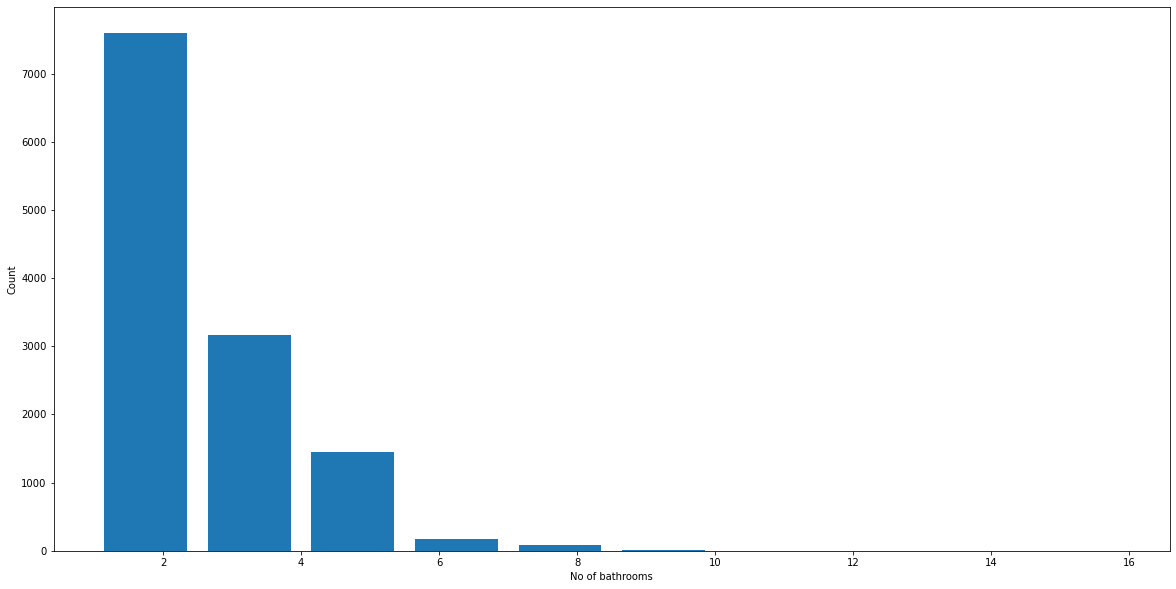

In [42]:
#Plotting histogram to know number of properties having what number of bathrooms.
# r-width is basically the width of the bars.

plt.hist(df6.bath, rwidth = 0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

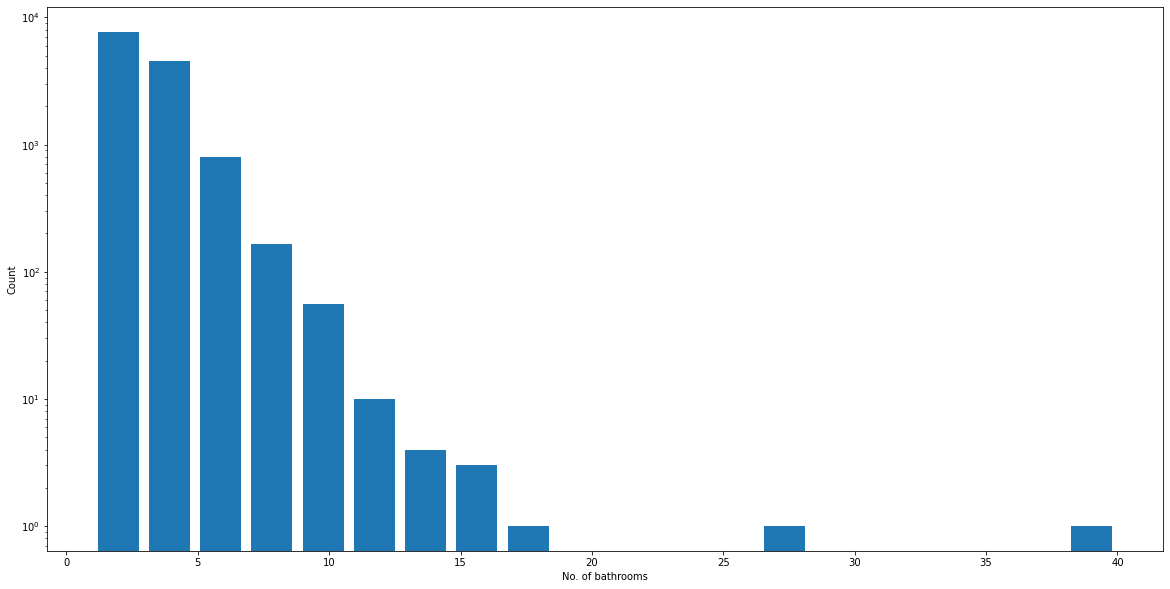

In [72]:
# The things are much clearer when we use log axis as comapred to normal one which you can see.
#The bars become much bigger and comparable when we convert to log axis.
#Log function can be used when we have outliers values which may negatively affect the model.

plt.hist(df.bath, bins=20, rwidth=0.8)
plt.xlabel('No. of bathrooms')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [43]:
#Lets assume that bathrroms cannot be > no. of bedrooms +2. If they are ,we will remove them,Since its very unlikely 
# to have bathrooms 3 or more tham bedrooms.
#Rows which have bedrooms>bathrooms.

df8= df7[df7.bath<df7.bhk+2]

In [44]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [45]:
df8.shape

(10147, 7)

In [46]:
# Now price per sqft can be dropped because we used that for removing the outliers and 
#size can be dropped since we have bhk instead.

df9=df8.drop(['size','price_per_sqft'],axis='columns')

In [47]:
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


Since ML model doesnot understand categorical data, we'll have to convert it into numeric data for which we will use one hot encoding.
One hot Encoding is an effective way of ML modelling where we convert the categorical data into binary numbers.
Another method can be Label Encoding, where we assign 1,2,3 etc numbers but the problem is that here the ML model may assign them priority according to the number. Hence we are using one hot encoding here.

<img src="one_hot_encode.jpg" style="width:700px;height:350px"/>

In [48]:
#created dummies which is the one hot encoding method

dummies= pd.get_dummies(df9.location)

In [49]:
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#concatenating the dummies column with the original df8 and storing in df9.But we have to take care of the dummy variable trap
#the dummmy variable trap is a situation where the attributes are highly correlated and may predict the values of others.
#Hence we will be dropping 'others' column to avoid the trap.

df10 = pd.concat([df9,dummies.drop('other',axis= 'columns') ],axis='columns')

In [51]:
df10

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,1440.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,other,1075.0,2.0,48.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#dropping the location column since we already have it in the dummy columns

df11= df10.drop('location',axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11.shape

(10147, 245)

# Data Modelling

In [54]:
#now we start our data modelling i.e storing output variable in y and input variables in x.

X = df11.drop('price',axis= 'columns')

In [55]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
#importing test_train_split method from sklearn.model_selection

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.26,random_state=30)

In [58]:
#using a Linear regresion

from sklearn.linear_model import LinearRegression

In [59]:
#creating a linear regression model.

model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8462534338325025

In [60]:
#Since our accuracy of the model will alwayz change according to the test size and random state, we will use K-fold cross validation.
#Now we will do K-fold cross validation to evaluate the score of the model.
#We calculate the score for each fold and take the average of then that score which is the final score of our model.
#ShuffleSplit will randomize the sample such that each fold has equal distribution of data samples.

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size = 0.2,random_state=0)

score= cross_val_score(LinearRegression(),X,y,cv=cv)

<img src="K-Fold-Cross-Validation.png" style="width:700px;height:350px"/>

In [61]:
score

array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

In [62]:
score.mean()

0.7977723574660674

In [63]:
#These are the columns

X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [64]:
#so basically it will tell the index of the location out of the total location.

np.where(X.columns == 'Whitefield')[0][0]

238

In [65]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >=0:
        x[loc_index] = 1
        
    return model.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar', 1000 ,2, 2)

77.39611731089869

In [67]:
predict_price('1st Phase JP Nagar', 1000 ,2, 3)

72.12914260538113